In [1]:
! git clone https://github.com/glenclayton/GAN-generate-data.git

Cloning into 'GAN-generate-data'...
remote: Enumerating objects: 183, done.
remote: Counting objects: 100% (183/183), done.
remote: Compressing objects: 100% (173/173), done.
remote: Total 183 (delta 16), reused 166 (delta 5), pack-reused 0
Receiving objects: 100% (183/183), 3.53 MiB | 4.68 MiB/s, done.
Resolving deltas: 100% (16/16), done.


In [2]:
%cd GAN-generate-data

/content/GAN-generate-data


In [ ]:
%conda install pytorch torchvision cpuonly -c pytorch


Channels:
 - pytorch
 - defaults
 - conda-forge
Platform: linux-64
Solving environment: done

## Package Plan ##

  environment location: /workspaces/GAN-generate-data/.conda

  added / updated specs:
    - cpuonly
    - pytorch
    - torchvision


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    blas-1.0                   |              mkl           6 KB
    brotli-python-1.0.9        |  py311h6a678d5_7         318 KB
    certifi-2024.2.2           |  py311h06a4308_0         160 KB
    charset-normalizer-2.0.4   |     pyhd3eb1b0_0          35 KB
    cpuonly-2.0                |                0           2 KB  pytorch
    ffmpeg-4.3                 |       hf484d3e_0         9.9 MB  pytorch
    filelock-3.13.1            |  py311h06a4308_0          24 KB
    freetype-2.12.1            |       h4a9f257_0         626 KB
    gmp-6.2.1                  |       h295c915_3         544 KB
    

In [ ]:
%conda install pandas

Channels:
 - defaults
 - conda-forge
 - pytorch
Platform: linux-64
Solving environment: done

## Package Plan ##

  environment location: /workspaces/GAN-generate-data/.conda

  added / updated specs:
    - pandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    bottleneck-1.3.7           |  py311hf4808d0_0         145 KB
    numexpr-2.8.7              |  py311h65dcdc2_0         167 KB
    pandas-2.2.1               |  py311ha02d727_0        15.7 MB
    python-tzdata-2023.3       |     pyhd3eb1b0_0         140 KB
    pytz-2023.3.post1          |  py311h06a4308_0         216 KB
    ------------------------------------------------------------
                                           Total:        16.3 MB

The following NEW packages will be INSTALLED:

  bottleneck         pkgs/main/linux-64::bottleneck-1.3.7-py311hf4808d0_0 
  numexpr            pkgs/main/linux-64::numexpr-2.8.7-py311h6

In [ ]:
%conda install scikit-learn


Channels:
 - defaults
 - conda-forge
 - pytorch
Platform: linux-64
Solving environment: done

## Package Plan ##

  environment location: /workspaces/GAN-generate-data/.conda

  added / updated specs:
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    joblib-1.2.0               |  py311h06a4308_0         527 KB
    libgfortran-ng-11.2.0      |       h00389a5_1          20 KB
    libgfortran5-11.2.0        |       h1234567_1         2.0 MB
    numpy-1.24.3               |  py311h08b1b3b_1          11 KB
    numpy-base-1.24.3          |  py311hf175353_1         7.2 MB
    scikit-learn-1.3.0         |  py311ha02d727_1         9.5 MB
    scipy-1.12.0               |  py311h08b1b3b_0        23.6 MB
    threadpoolctl-2.2.0        |     pyh0d69192_0          16 KB
    ------------------------------------------------------------
                                           Total:

In [ ]:
%run data_treatment.py

CUDA!
diabetes_escalonated
id-0_epochs-100_layer-2_lr-0.0002_batch-5_arc-256,512
Epoch  0


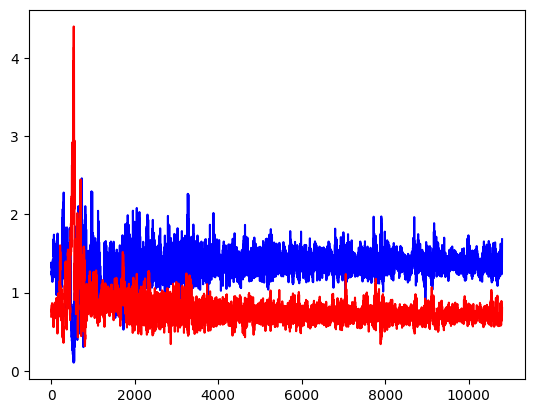

CUDA!
diabetes_escalonated
id-1_epochs-100_layer-1_lr-0.0002_batch-5_arc-256
Epoch  0


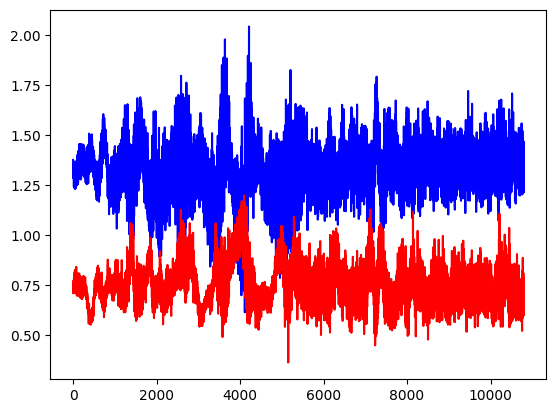

CUDA!
diabetes_escalonated
id-2_epochs-100_layer-2_lr-0.0002_batch-5_arc-128,256
Epoch  0


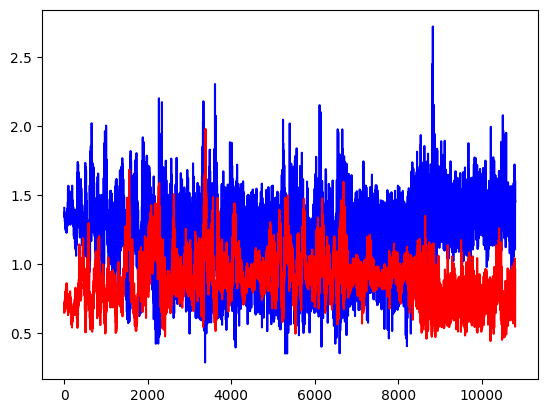

CUDA!
diabetes_escalonated
id-3_epochs-100_layer-1_lr-0.0002_batch-5_arc-128
Epoch  0


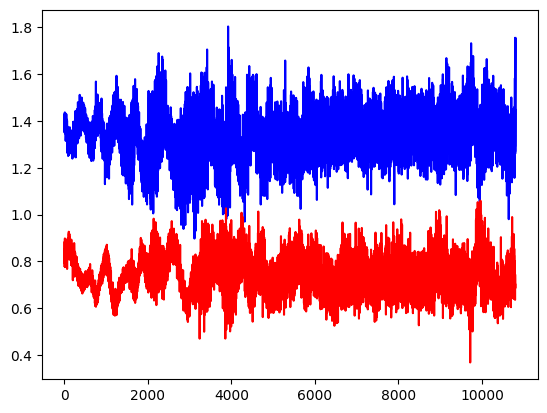

<Figure size 640x480 with 0 Axes>

In [15]:
import torch
import pandas as pd
from torch import nn, optim
from torch.autograd.variable import Variable
from torchvision import transforms, datasets
from data_treatment import DataSet, DataAtts
from discriminator import *
from generator import *
import os
# import ipywidgets as widgets
# from IPython.display import display
# import matplotlib.pyplot as plt
import glob
from utils import *
import matplotlib.pyplot as plt


class Architecture():
    def __init__(self, learning_rate, batch_size, loss, hidden_layers, name):
        self.learning_rate=learning_rate
        self.batch_size=batch_size
        self.loss=loss
        self.hidden_layers=hidden_layers
        self.name=name

def save_model(name, epoch, attributes, dictionary, optimizer_dictionary, loss_function, db_name, arch_name):
    torch.save({
        'epoch': epoch,
        'model_attributes': attributes,
        'model_state_dict': dictionary,
        'optimizer_state_dict': optimizer_dictionary,
        'loss': loss_function
    }, "models/" + db_name + "/" + name + "_" + arch_name + ".pt")


# Check if creditcard.csv exists and if so, create a scalonated version of it
# escalonate_creditcard_db()
if not os.path.isfile('./original_data/diabetes_escalonated.csv'):
    print("Database creditcard.csv not found, exiting...")
    exit()

file_names=["original_data/diabetes_escalonated.csv"]
num_epochs=[100]
learning_rate=[0.0002]
batch_size=[5]
number_of_experiments = 1
#hidden_layers=[[256, 512]]
hidden_layers=[[256, 512], [256], [128, 256], [128]]
# hidden_layers=[[256]]

#create the different architetures
architectures=[]
count=0
for lr in learning_rate:
    for b_size in batch_size:
        for hidden in hidden_layers:
            for i in range(number_of_experiments):
                name = "id-" + str(count)
                name += "_epochs-" + str(num_epochs[0])
                name += "_layer-" + str(len(hidden))
                name += "_lr-" + str(lr)
                name += "_batch-" + str(b_size)
                name += "_arc-" + ','.join(map(str, hidden))
                architectures.append( Architecture(
                        learning_rate=lr,
                        batch_size=b_size,
                        loss=nn.BCELoss(),
                        hidden_layers=hidden,
                        name=name
                    )
                )
                count+=1

for arc in architectures:
    print(arc)
#training process
for file_name, epochs in zip(file_names, num_epochs):
    dataAtts = DataAtts(file_name)
    database = DataSet (csv_file=file_name, root_dir=".", shuffle_db=False)

    for arc in architectures:
        if ("escalonated" in file_name):
            esc = torch.nn.Sigmoid()
        else:
            esc = False

        generatorAtts = {
            'out_features':dataAtts.class_len,
            'leakyRelu':0.2,
            'hidden_layers':arc.hidden_layers,
            'in_features':100,
            'escalonate':esc
        }
        generator = GeneratorNet(**generatorAtts)

        discriminatorAtts = {
            'in_features':dataAtts.class_len,
            'leakyRelu':0.2,
            'dropout':0.3,
            'hidden_layers':arc.hidden_layers[::-1]

        }
        discriminator = DiscriminatorNet(**discriminatorAtts)

        if torch.cuda.is_available():
            discriminator.cuda()
            generator.cuda()
            print("CUDA!")
        d_optimizer = optim.Adam(discriminator.parameters(), lr=arc.learning_rate)
        g_optimizer = optim.Adam(generator.parameters(), lr=arc.learning_rate)
        loss = arc.loss
        data_loader = torch.utils.data.DataLoader(database, batch_size=arc.batch_size, shuffle=True)
        num_batches = len(data_loader)

        print(dataAtts.fname)
        print(arc.name)

        d_error_plt = []
        g_error_plt = []

        for epoch in range(epochs):
            if (epoch % 100 == 0):
                print("Epoch ", epoch)

            for n_batch, real_batch in enumerate(data_loader):
                # 1. Train DdataAtts.fnameiscriminator
                real_data = Variable(real_batch).float()
                if torch.cuda.is_available():
                    real_data = real_data.cuda()
                # Generate fake data
                fake_data = generator(random_noise(real_data.size(0))).detach()
                # Train D
                d_error, d_pred_real, d_pred_fake = train_discriminator(d_optimizer, discriminator, loss, real_data, fake_data)

                # 2. Train Generator
                # Generate fake data
                fake_data = generator(random_noise(real_batch.size(0)))
                # Train G
                g_error = train_generator(g_optimizer, discriminator, loss, fake_data)

                d_error_plt.append(d_error.cpu().detach())
                g_error_plt.append(g_error.cpu().detach())

        torch.save({
            'epoch': epoch,
            'model_attributes': generatorAtts,
            'model_state_dict': generator.state_dict(),
            'optimizer_state_dict': g_optimizer.state_dict(),
            'loss': loss
           }, "models/" + dataAtts.fname + "/generator_" + arc.name + ".pt")


        torch.save({
            'epoch': epoch,
            'model_attributes': discriminatorAtts,
            'model_state_dict': discriminator.state_dict(),
            'optimizer_state_dict': d_optimizer.state_dict(),
            'loss': loss
        }, "models/" + dataAtts.fname + "/discriminator_" + arc.name + ".pt")

        # Display Plots
        plt.plot(d_error_plt, 'b')
        plt.plot(g_error_plt, 'r')
        filename = "results/" + dataAtts.fname + "/" + "error_growth.txt"
        file = open(filename, "w")
        file.write("Discriminator error: " + str(d_error_plt) + "\n")
        file.write("\n\n\n")
        file.write("Generator error: " + str(g_error_plt) + "\n")
        file.close()

        plt.savefig('images/'+ dataAtts.fname + "/"+ 'error.png')
        plt.show()
        plt.clf()


        # From this line on it's just the saving
        # save_model("generator", epoch, generatorAtts, generator.state_dict(), g_optimizer.state_dict(), loss, dataAtts.fname, arc.name)
        # save_model("discriminator", epoch, discriminatorAtts, discriminator.state_dict(), d_optimizer.state_dict(), loss, dataAtts.fname, arc.name)


In [ ]:
#TODO:Fix the plots

#plt.plot(d_error_plt, 'b')
#plt.plot(g_error_plt, 'r')
filename = "results/" + dataAtts.fname + "/" + "error_growth.txt"
file = open(filename, "w")
file.write("Discriminator error: " + str(d_error_plt) + "\n")
file.write("\n\n\n")
file.write("Generator error: " + str(g_error_plt) + "\n")
file.close()

plt.savefig('images/'+ dataAtts.fname + "/"+ 'error.png')
plt.show()
plt.clf()

NameError: name 'dataAtts' is not defined